<a href="https://colab.research.google.com/github/maryam-shchgh/nn-project-collection/blob/main/Costumer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Overwiew**

A company wants to predict customer churn, i.e., whether a customer will leave their service. They want you to build a machine learning model that predicts customer churn based on customer behavior and demographics. This project includes cleaning the data, building a model, tuning hyperparameters, and deploying the model.

**Objectives**


*   Predict whether a costumer will churn based on the available data
*   Provide insights on which factors are most important in customer churn.
*   The final deliverable should include both the trained model and a dashboard or interface for users to interact with predictions.



# **Importing Modules**

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# **Data Collection & EDA**

In [12]:
# Dataset is available on Kaggle : https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download

df = pd.read_csv('/content/drive/MyDrive/coding/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [18]:
#Identifying Missing Values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_info[missing_info['Missing Values'] > 0])  # Display columns with missing values

Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


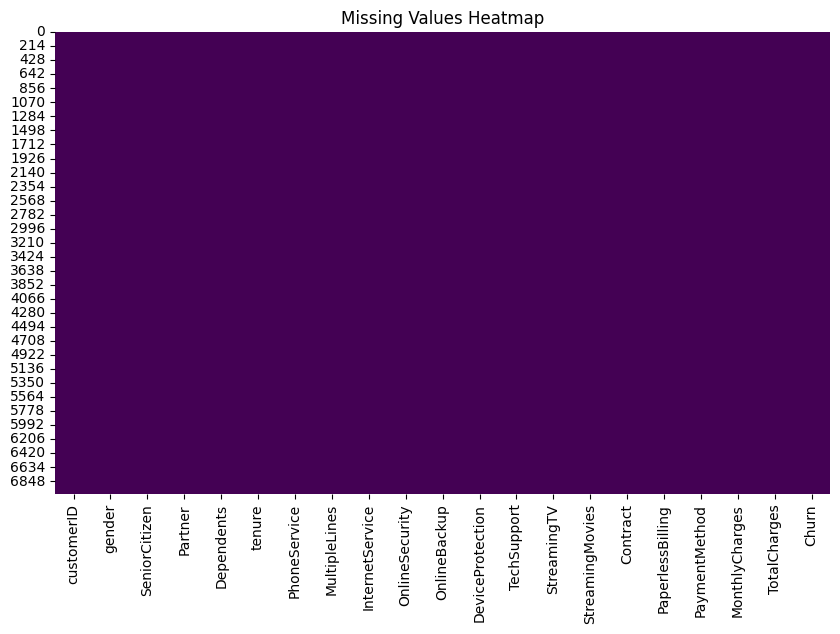

In [22]:
#Visualizing Missing Values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

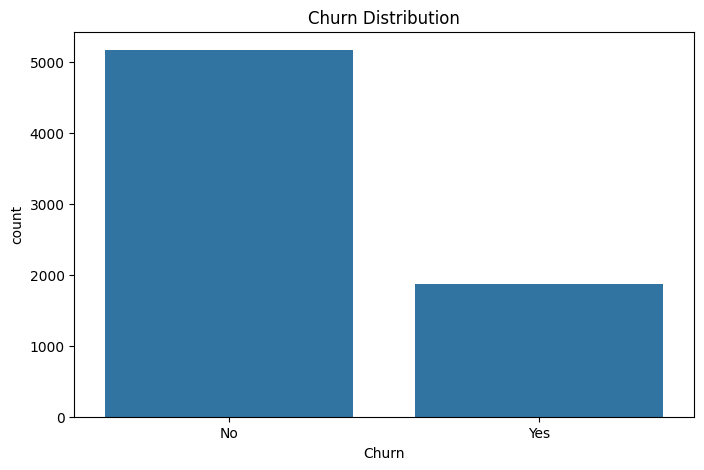

In [24]:
#Visualizing the target variable
plt.figure(figsize=(8, 5))
sns.countplot(data = df, x = 'Churn')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('count')
plt.show()

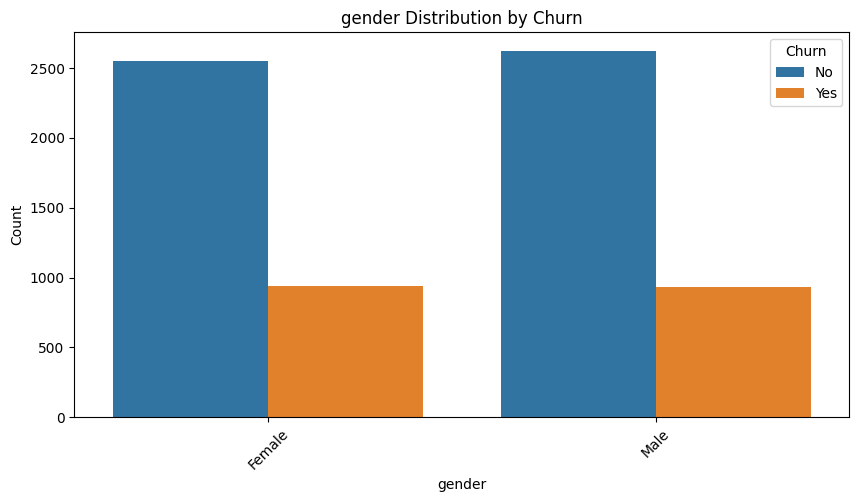

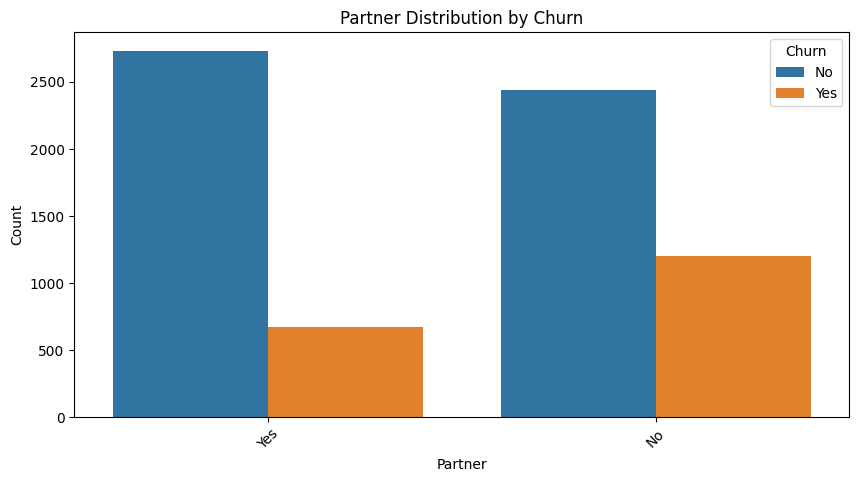

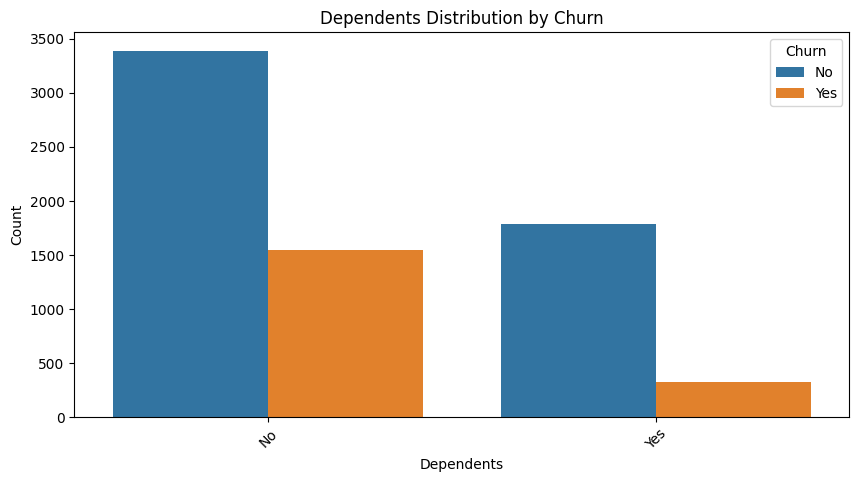

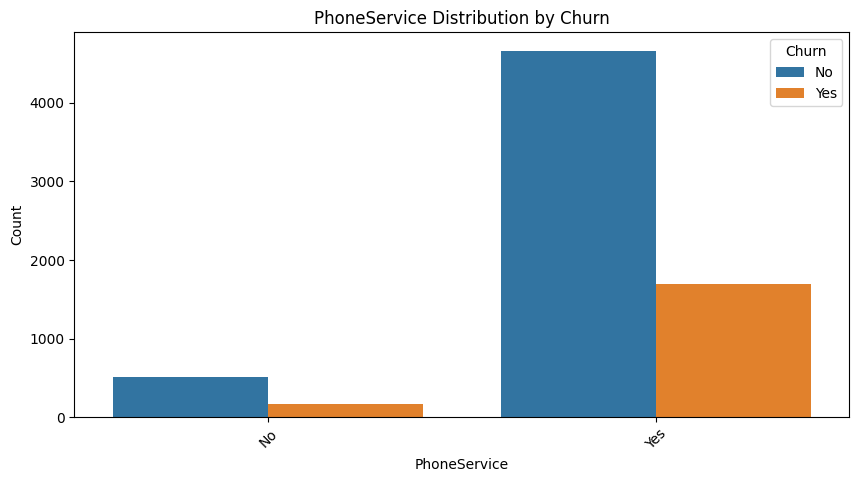

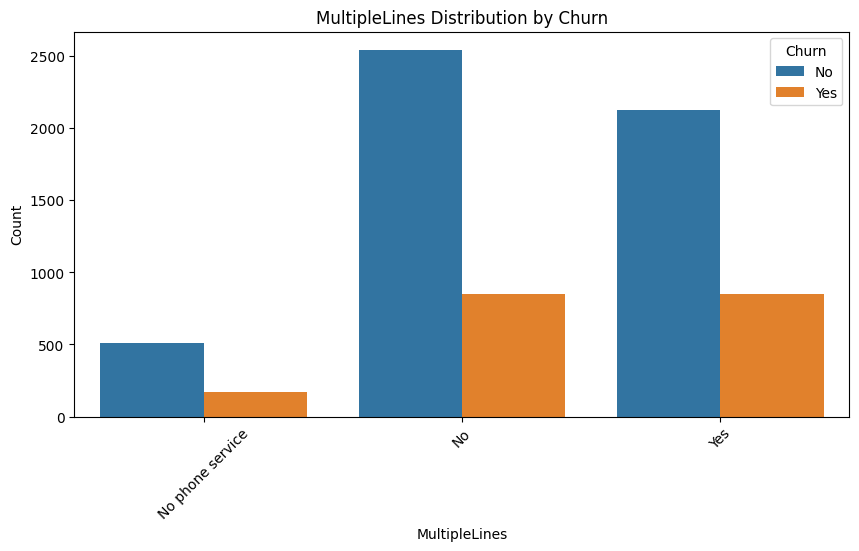

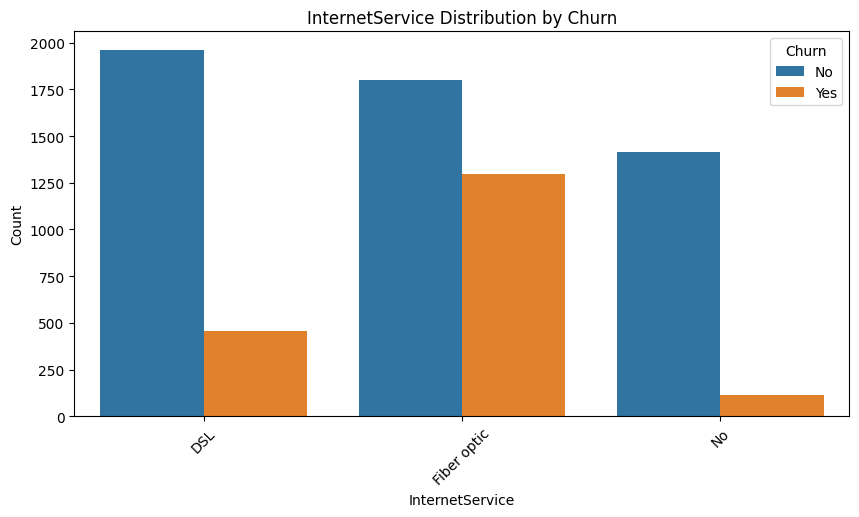

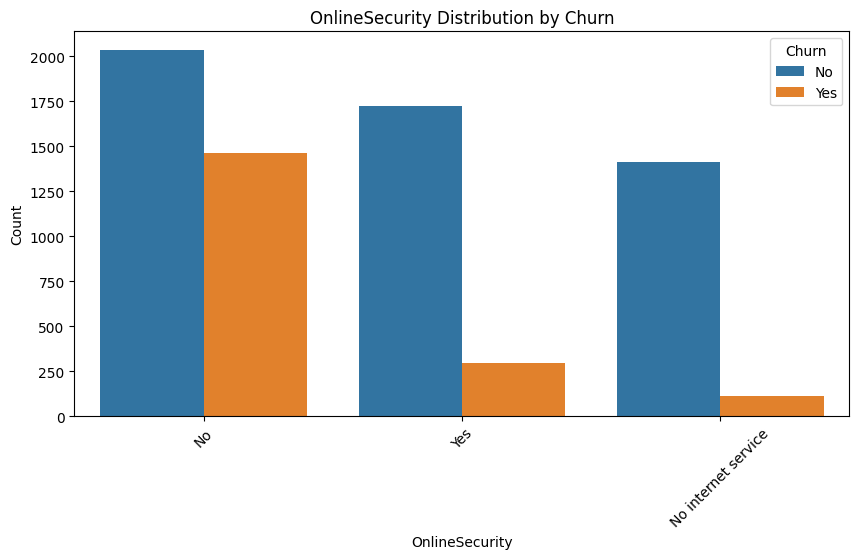

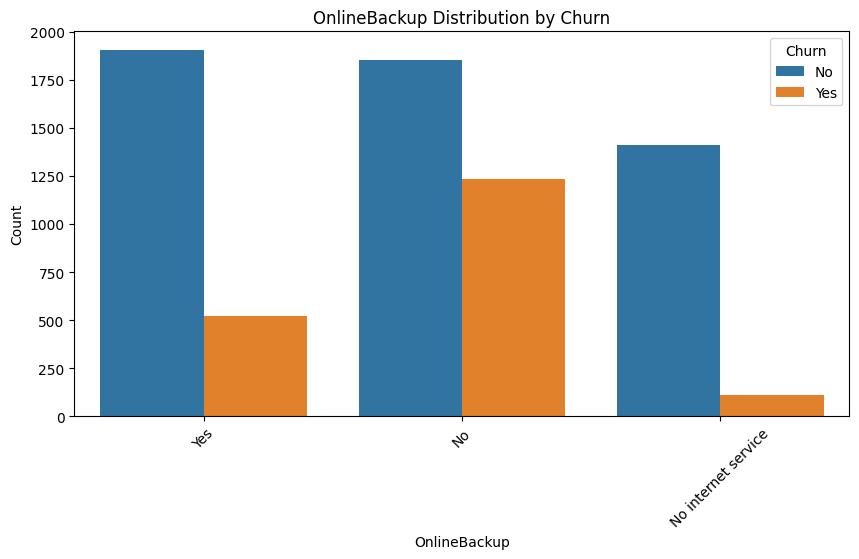

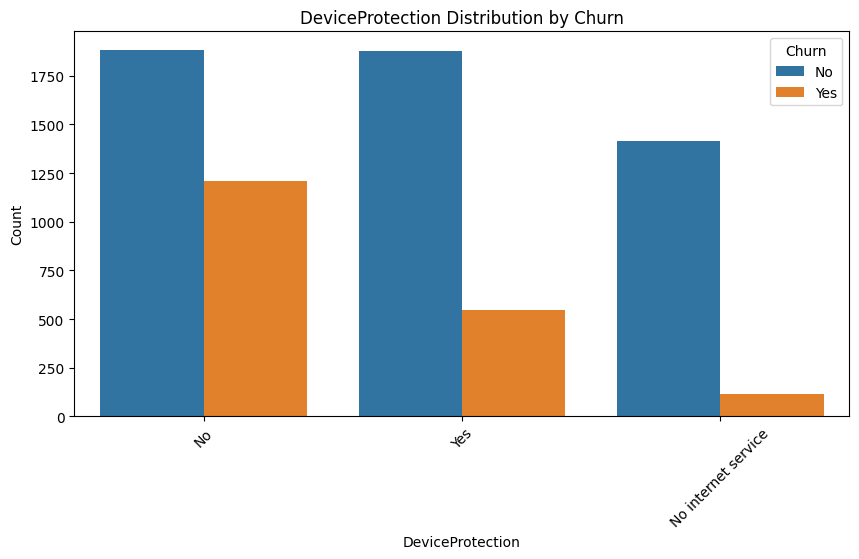

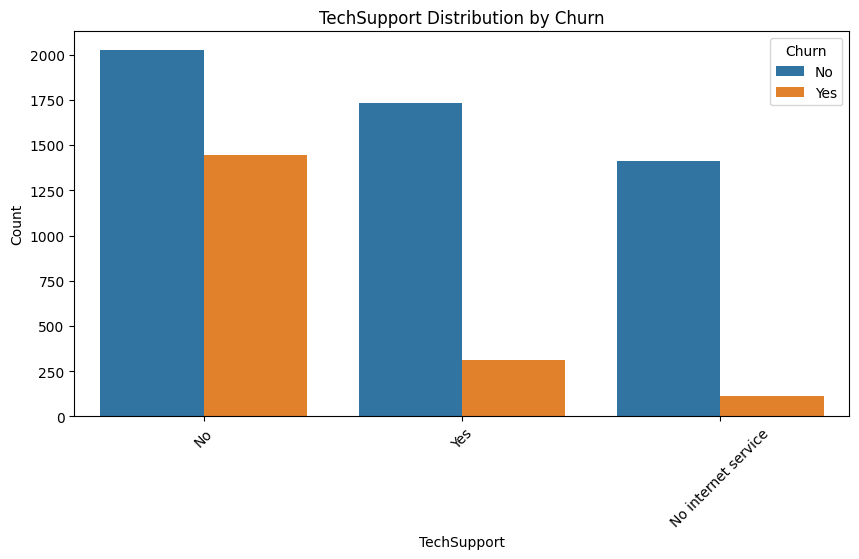

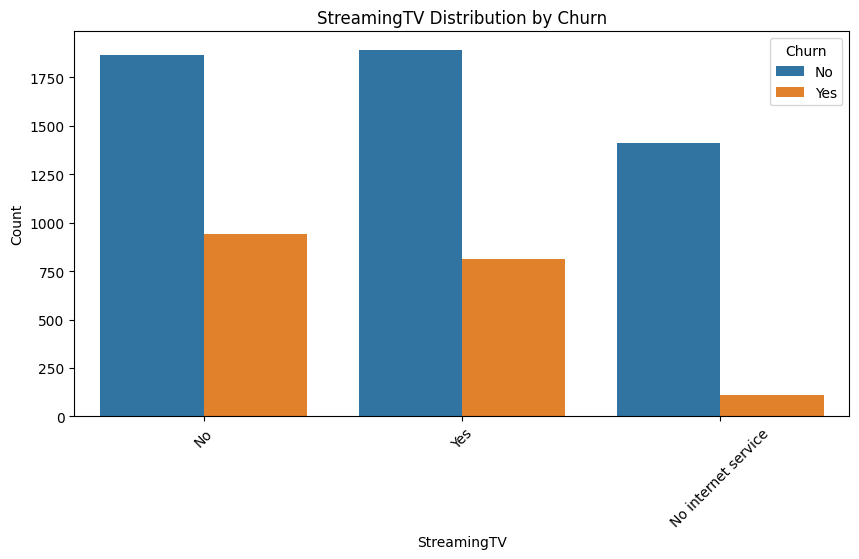

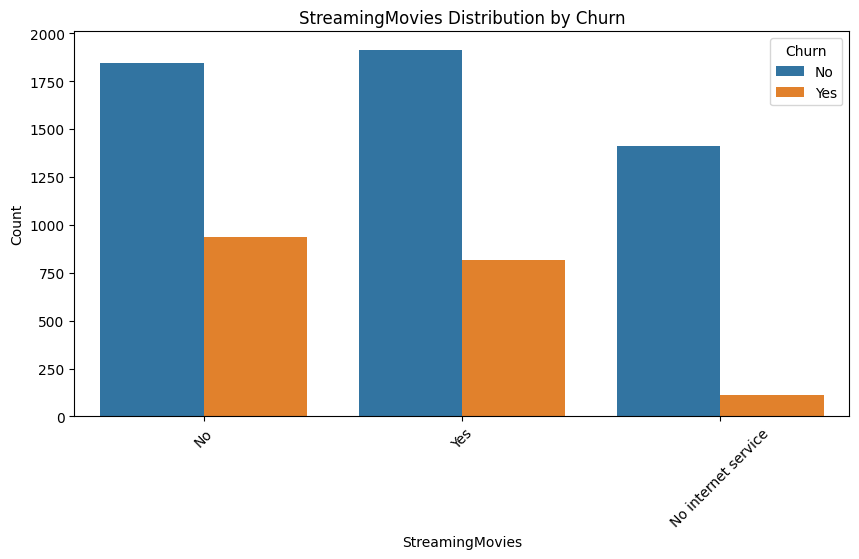

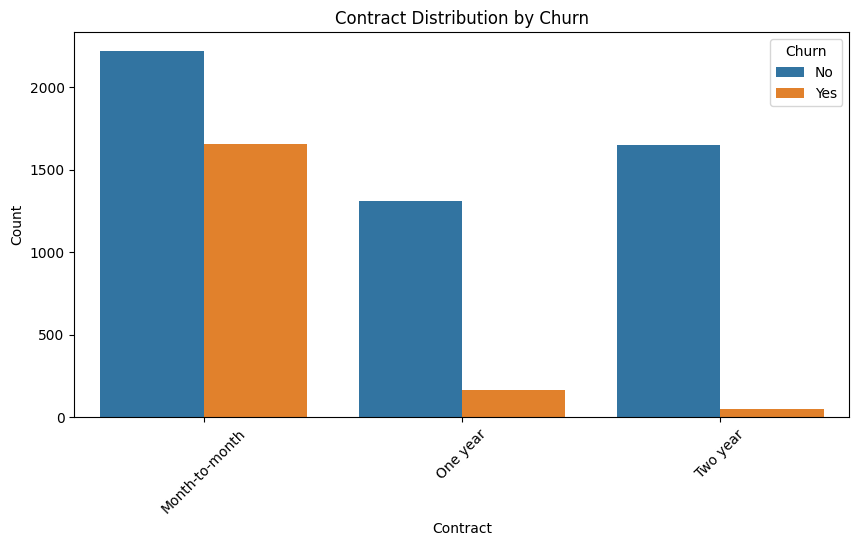

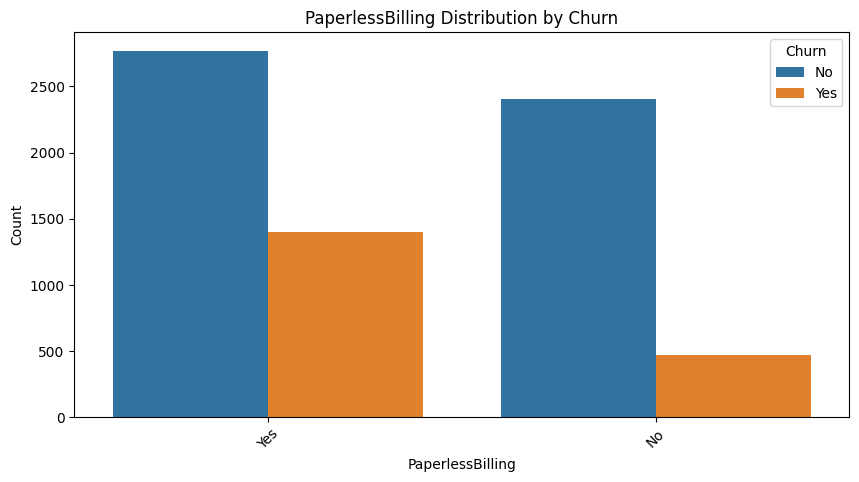

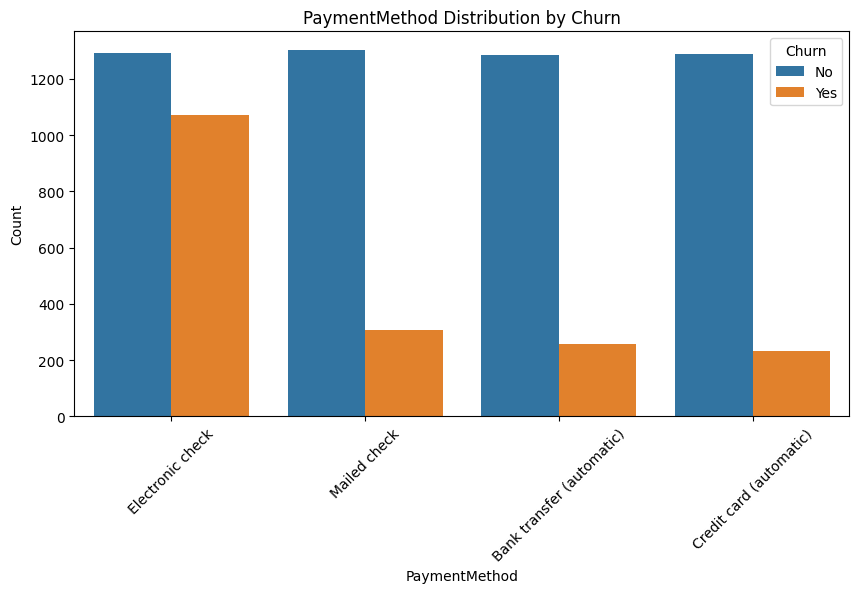

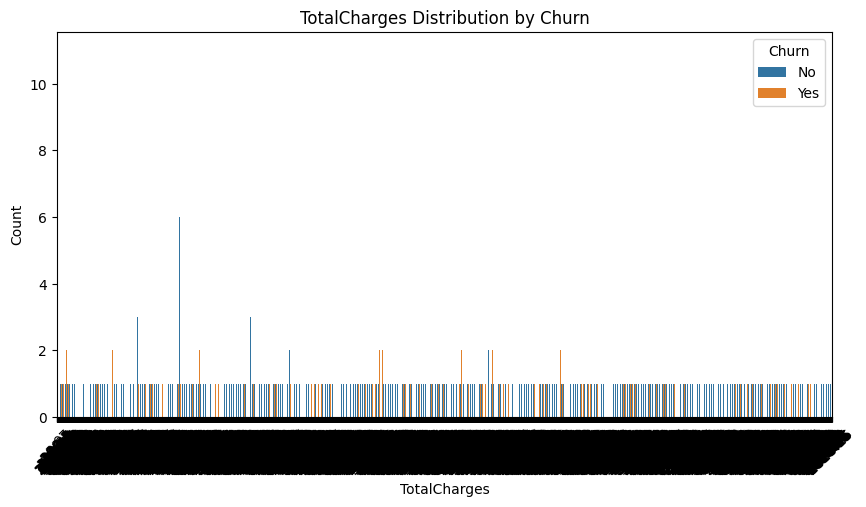

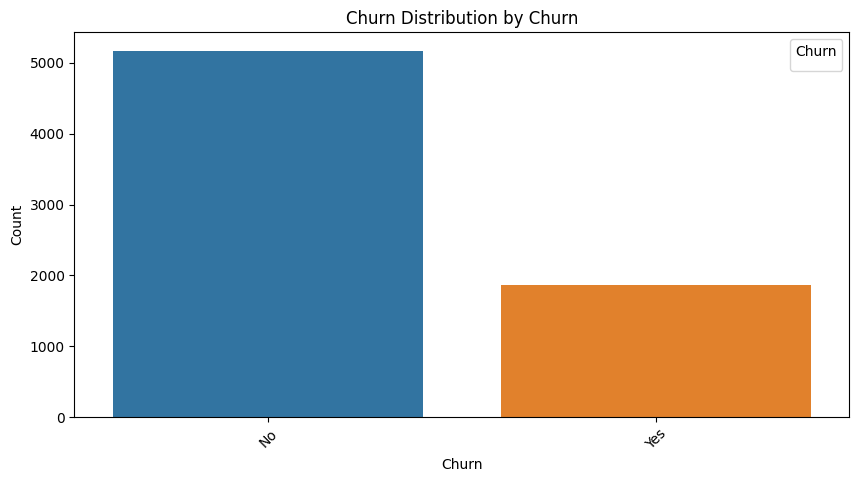

In [29]:
# Explore Categorical Features
df.drop('customerID', axis = 1 , inplace = True) #Costumer ID is not relevant to churn rate
categorical_features = df.select_dtypes(include = ['object']).columns

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=feature, hue='Churn')  # Replace 'churn' with the actual column name
    plt.title(f'{feature} Distribution by Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Churn', loc='upper right')
    plt.xticks(rotation=45)
    plt.show()

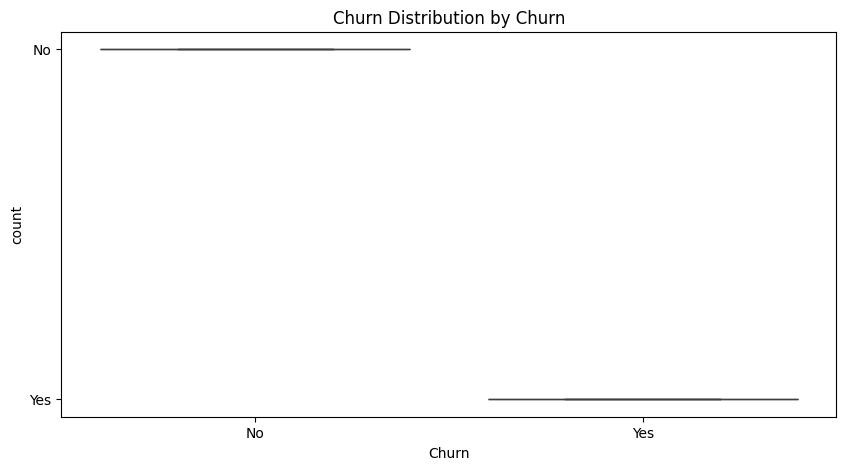

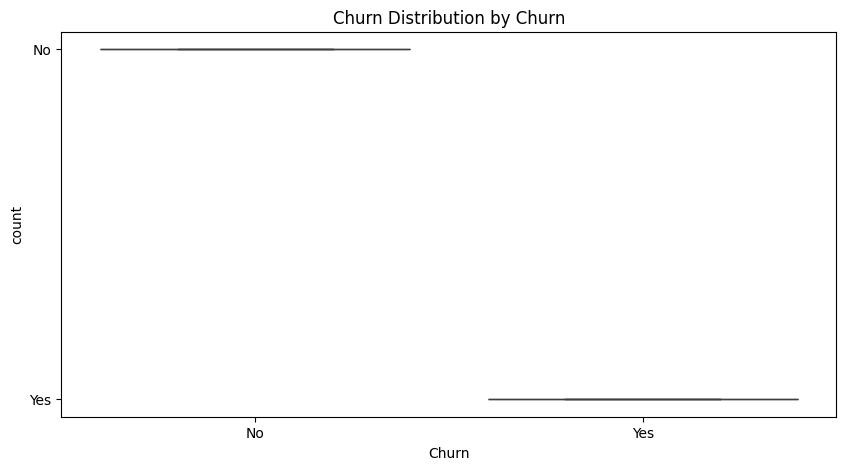

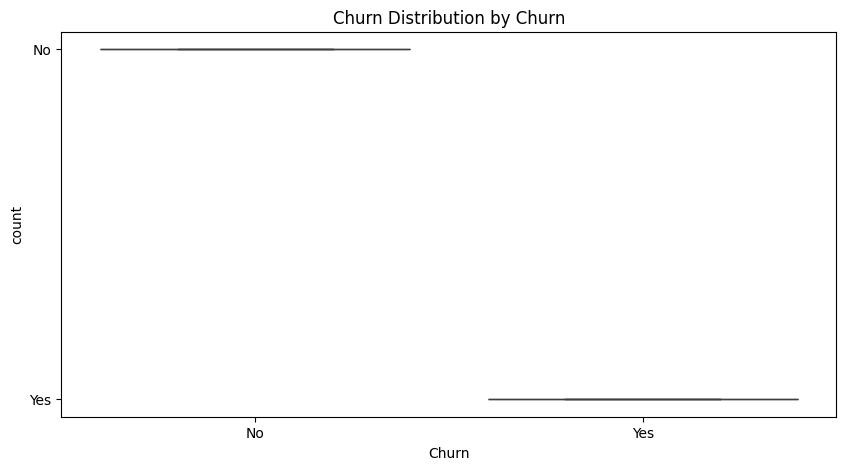

In [33]:
# Explore Numerical Features
numerical_features = df.select_dtypes(include = ['float64' , 'int64']).columns
for features in numerical_features:
  plt.figure(figsize = (10, 5))
  sns.boxplot(data = df, x = 'Churn', y = feature)
  plt.title(f'{feature} Distribution by Churn')
  plt.xlabel(feature)
  plt.ylabel('count')
  plt.show()

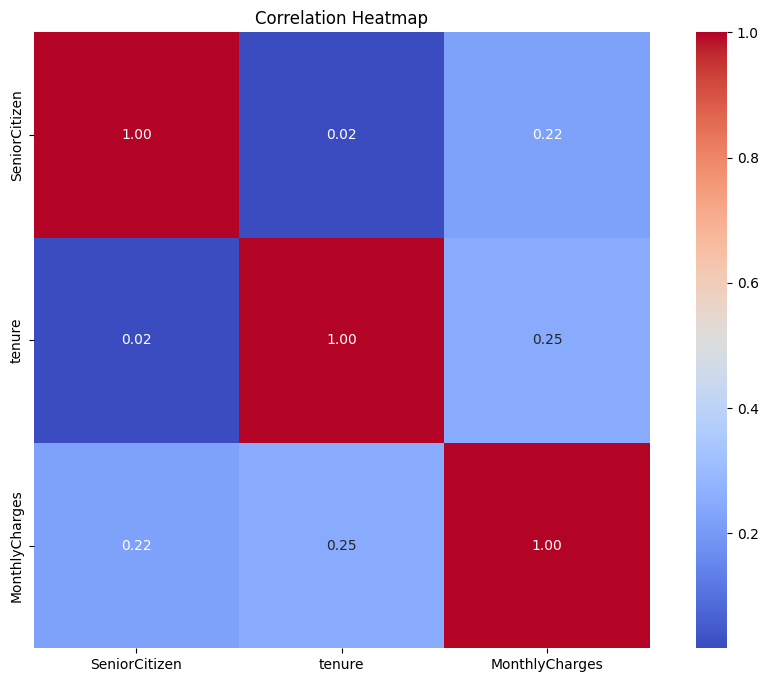

In [35]:
#Examining the correlation between the numerical features and the target variable 'Churn'
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

# **Data Preprocessing**

In [46]:
# Handling Missing values - There is no missing value in the dataset
# The unrelated feature is droped

#Train Test Splitting
df = pd.get_dummies(df, drop_first=True)
X = df.drop('Churn_Yes', axis=1)
Y = df['Churn_Yes']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state = 42)

# **Logistic Regression**

In [48]:
logistic_model = LogisticRegression(max_iter = 1000)
logistic_model.fit(X_train, Y_train)

y_pred_logistic = logistic_model.predict(X_test)

print(f'Logistic Regression Accuracy Score is {round(accuracy_score(Y_test, y_pred_logistic),2)}')

Logistic Regression Accuracy Score is 0.82


# **Random Forest**

In [49]:
random_forest_model = RandomForestClassifier(random_state = 42)
random_forest_model.fit(X_train, Y_train)

y_pred_random_forest = random_forest_model.predict(X_test)

print(f'Random Forest Accuracy Score is {round(accuracy_score(Y_test, y_pred_random_forest),2)}')

Random Forest Accuracy Score is 0.8


# **XGBoost**

In [55]:
xgb_model = XGBClassifier(eval_metric = 'logloss')
xgb_model.fit(X_train, Y_train)

y_pred_xgb = xgb_model.predict(X_test)

print(f'XGBoost Accuracy Score is {round(accuracy_score(Y_test, y_pred_xgb),2)}')

XGBoost Accuracy Score is 0.79


# **LightGBM**

In [57]:
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, Y_train)

y_pred_lgbm = lgbm_model.predict(X_test)

print(f'LightGBM Accuracy Score is {round(accuracy_score(Y_test, y_pred_lgbm),2)}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 382
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418
LightGBM Accuracy Score is 0.8
